In [1]:
import seizure_detection_simple

data = seizure_detection_simple.doload('Dog_1', False, False)

Reading from clips/Dog_1/ 596 596


In [2]:
data

<class 'pandas.core.panel.Panel'>
Dimensions: 596 (items) x 400 (major_axis) x 17 (minor_axis)
Items axis: ictal_1 to interictal_99
Major_axis axis: 0 to 399
Minor_axis axis: 0 to time

In [3]:
data.keys()

Index(['ictal_1', 'ictal_10', 'ictal_100', 'ictal_101', 'ictal_102',
       'ictal_103', 'ictal_104', 'ictal_105', 'ictal_106', 'ictal_107',
       ...
       'interictal_90', 'interictal_91', 'interictal_92', 'interictal_93',
       'interictal_94', 'interictal_95', 'interictal_96', 'interictal_97',
       'interictal_98', 'interictal_99'],
      dtype='object', length=596)

In [4]:
data['ictal_1'].keys()

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'time'], dtype='object')

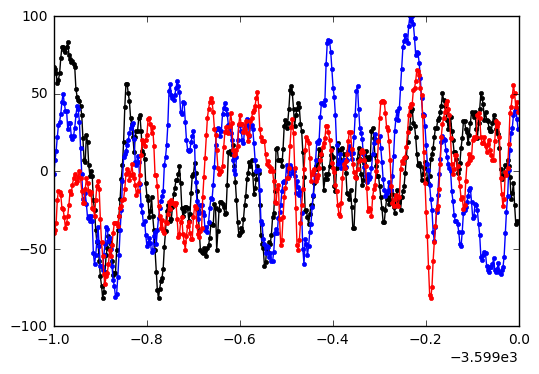

In [5]:
seizure_detection_simple.plot(data)

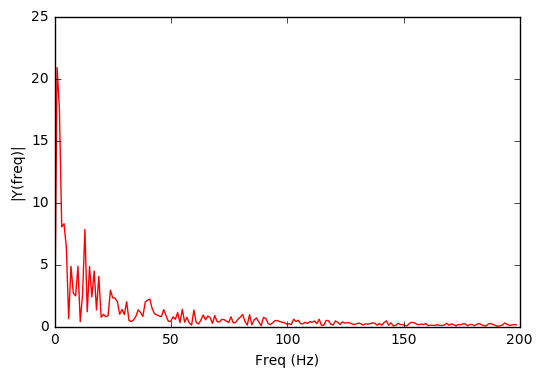

In [6]:
seizure_detection_simple.plotSpectrum(data['ictal_1'][0], 399)

In [7]:
import numpy as np

def fft(time_data):
    return np.log10(np.absolute(np.fft.rfft(time_data, axis=1)[:,1:48]))


## Step 1.3

In [25]:
# For each segment in data.keys(), take data[segment], transpose it, and call fft() on it.
# Take the result (all channels by all 47 frequencies) and convert it into a 1D array.
# This is a feature row in 2D array X.
# Set the class label for the same row in 1D array y, dependong on if the segment name 
# includes 'interictal' (this is a non-match) vs 'ictal' (this is a match)
X = []
y = []
for k in data.keys():
    f = fft(np.array(data[k].transpose()))
    X.append(np.reshape(f, (np.product(f.shape),)))
    if k[:5] == 'ictal':
        y.append(0)
    else:
        y.append(1)


In [26]:
# Create X_train, X_test, y_train, y_test with
# random_state = 42 and test_size = 0.3
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# len(y_train)
# X_train

In [29]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(solver = 'liblinear', penalty = 'l1', random_state = 42, C = 10.0)
clf_LR.fit(X_train, y_train)
pre_LR = clf_LR.predict(X_test)
score_LR = len(pre_LR[pre_LR == y_test]) / len(pre_LR)
score_LR

0.9720670391061452

In [30]:
#SVM
from sklearn.svm import SVC
clf_svm = SVC(random_state = 42, kernel = 'linear')
clf_svm.fit(X_train, y_train)
pre_svm = clf_svm.predict(X_test)
score_svm = len(pre_svm[pre_svm == y_test]) / len(pre_svm)
score_svm

0.9720670391061452

In [42]:
#Bag
from sklearn.ensemble import BaggingClassifier
clf_Bag = BaggingClassifier(SVC(random_state = 42, kernel = 'linear'), n_estimators=100)
clf_Bag = clf_Bag.fit(X_train, y_train)
pre_Bag = clf_Bag.predict(X_test)
score_Bag = len(pre_Bag[pre_Bag == y_test]) / len(pre_Bag)
score_Bag

0.9720670391061452

In [40]:
#Bag
from sklearn.ensemble import BaggingClassifier
clf_Bag = BaggingClassifier(LogisticRegression(solver = 'liblinear', penalty = 'l1', random_state = 20, C = 5.0), n_estimators=20)
clf_Bag = clf_Bag.fit(X_train, y_train)
pre_Bag = clf_Bag.predict(X_test)
score_Bag = len(pre_Bag[pre_Bag == y_test]) / len(pre_Bag)
score_Bag

0.9664804469273743

In [43]:
#preprocessing data Bag
XX = preprocessing.StandardScaler().fit(X).transform(X)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, y, test_size=0.3, random_state=42)
new_clf_Bag = BaggingClassifier(SVC(random_state = 42, kernel = 'linear'), n_estimators=100)
new_clf_Bag = new_clf_Bag.fit(XX_train, yy_train)
new_pre_Bag = new_clf_Bag.predict(XX_test)
new_score_Bag = len(new_pre_Bag[new_pre_Bag == yy_test]) / len(new_pre_Bag)
new_score_Bag

1.0

## Step 1.4 Best Result

In [158]:
## Produce your best output here!

1.0